<a href="https://colab.research.google.com/github/Saadkhan55/Arm-Intern-Challenge/blob/master/dimensionalityreduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

Dimensionality reduction is a key data pre-processing technique. You will perform PCA, a popular dimensionality reduction technique to MNIST data to see how it performs.

In [0]:
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures + statistical figures not in MPL.
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image

from sklearn.datasets import fetch_mldata                                                                       
from sklearn.utils import shuffle                                                                                                                                                                      
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC , SVR 
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier                                                       
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV                                                
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pydot, io
import time

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

#######################End imports###################################
#######################End imports###################################


Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


<Figure size 432x288 with 0 Axes>

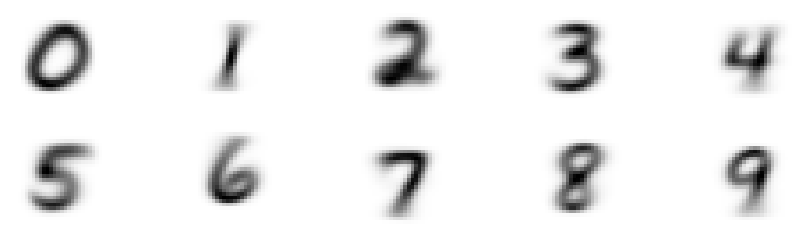

In [14]:
####################Do not change anything below
#Load MNIST data. fetch_mldata will download the dataset and put it in a folder called mldata. 
#Some things to be aware of:
#   The folder mldata will be created in the folder in which you started the notebook
#   So to make your life easy, always start IPython notebook from same folder.
#   Else the following code will keep downloading MNIST data

# *******Data loading attempted fix**********

# try:
#   mnist = fetch_mldata("MNIST original")                                                                                   

# except Exception as ex: 
  import tensorflow.examples.tutorials.mnist.input_data as input_data
  m=input_data.read_data_sets("MNIST")
  data = np.concatenate((m.train.images, m.test.images))
  target = np.concatenate((m.train.labels, m.test.labels))
  class dataFrame:
    def __init__(self, data, target):
      self.data = data
      self.target = target
  mnist = dataFrame(data, target)

                                                                                                             
#In order to make the experiments repeatable, we will seed the random number generator to a known value
# That way the results of the experiments will always be same
np.random.seed(1234)                        

# Recall that we previously used shuffle and assigned first 5000 data as training and remaining as testing
# Here is another way to do this
# Here we are using a function in cross validation module to split 
# By convention, let us use a 70/30 split
train_data, test_data, train_labels, test_labels = \
        train_test_split(mnist.data, mnist.target, test_size=0.3)

#The images are in grey scale where each number is between 0 to 255
# Now let us normalize them so that the values are between 0 and 1. 
# This will be the only modification we will make to the image
train_data = train_data / 255.0                                        
test_data = test_data / 255.0

# Plot the average value of all digits
plt.figure()
fig,axes = plt.subplots(2, 5, figsize=(15,4))

for i in range(10):
    row, col = i // 5, i%5
    
    #Change below: Subset p3_train_data with images for digit i only 
    # Possible to do it 1 liner (similar to how it is done in Pandas)
    digit_i_subset = train_data[train_labels == i]
    
    #Change below: compute avg value of t3a_digit_i_subset
    # remember to use a vectorized version of mean for efficiency
    digit_i_subset_mean = np.mean(digit_i_subset, axis=0)

    #Do not change below
    axes[row][col].imshow( digit_i_subset_mean.reshape(28, 28), cmap="Greys") 
    axes[row][col].grid(False)
    axes[row][col].get_xaxis().set_ticks([])
    axes[row][col].get_yaxis().set_ticks([])

### Exercise 7: Dimensionality Reduction (25 marks)

- Task 7a: Train a multi-class classifier (OneVsRest) with LinearSVC class and make predictions and print the training time and classification accuracy on the test set. (5 marks)

- Task 7b: Perform PCA with 100 components on the training data, map both training and test data into 100-dimensional space by PCA, train a multi-class classifier (OneVsRest) with LinearSVC class using the trainformed training data, make predictions and print the training time and the classification accuracy on the test set. (10 marks)

- Task 7c: One way to determine how much components needs for PCA is to find the smallest value such that it explained 95% of the variance. Using the PCA results obtained above, print the cumulative variance that is explained by 100 components. (10 marks)

In [20]:
# Task t7a (5 marks)
# Train a multi-class classifier (OneVsRest) with LinearSVC class and make predictions
# Print the training time and classification accuracy on the test set
# Write your code here
start_time = time.time()

classif = OneVsRestClassifier(LinearSVC())
classif.fit(train_data, train_labels)
print(classif.score(test_data, test_labels))
print("%s seconds" % (time.time() - start_time))

0.8356923076923077
20.399116039276123 seconds


In [0]:
# Task t7b (10 marks)
# Perform PCA on the training data and map both training and test data into 100-dimensional space by PCA, 
# Train a multi-class classifier (OneVsRest) with LinearSVC class using the trainformed training data,
# Print the training time and classification accuracy on the test set
# Remember that MNIST images are 28x28 => 784 features.

# You might want to check http://scikit-learn.org/stable/modules/decomposition.html#decompositions for details
# Write your code below



In [0]:
# Task t7c (10 marks)

# One way to determine how much components needs for PCA is to find the smallest value 
# such that it explained 95% of the variance. 
# Using the PCA results obtained above, print the cumulative variance that is explained 
# by 100 components.
# Write your code below